In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
plot_size = (14, 10)

## Load data

In [3]:
#load data
new_data = "new-data/Seasons_Stats.csv"

def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(new_data)

In [4]:
nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Data cleaning
- Drop columns don't needed
- Delete NA and inf values
- Correct dtypes values

In [5]:
#Dataset info
print(nba_data.columns)
#24,691 entries

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [6]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [7]:
nba_data = nba_data.fillna(0)

In [8]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [9]:
# Delete colum ns
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2', 'Unnamed: 0'])

In [10]:
nba_data.sample(10)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
14936,Charlie Ward,PG,29,NYK,72,69.0,1986,13.6,0.559,0.591,0.130,1.4,11.9,6.8,23.8,2.6,0.6,17.8,13.7,2.5,3.0,5.5,0.133,1.5,1.7,3.3,2.6,189.0,447.0,0.423,102,264,0,87.0,183.0,0.475,0.537,48.0,58.0,0.828,22,206,228,300,95,16,102,176,528,2000
15617,Michael Curry,SG,33,DET,82,75.0,1912,6.2,0.521,0.094,0.330,0.9,9.4,5.2,10.1,1.3,0.4,16.0,9.3,0.7,1.6,2.3,0.057,-3.2,0.4,-2.8,-0.4,125.0,276.0,0.453,7,26,0,118.0,250.0,0.472,0.466,72.0,91.0,0.791,15,153,168,127,47,10,60,207,329,2002
3805,Justus Thigpen,SG,25,DET,18,0.0,99,7.8,0.404,0.000,0.000,0.0,0.0,4.4,11.6,0.0,0.0,0.0,0.0,-0.2,0.1,-0.1,-0.061,0.0,0.0,0.0,0.0,23.0,57.0,0.404,0,0,0,23.0,57.0,0.404,0.404,0.0,0.0,0.000,0,0,9,8,0,0,0,18,46,1973
19493,Keyon Dooling,PG,28,NJN,77,18.0,2074,13.6,0.562,0.393,0.258,1.4,7.6,4.5,21.3,1.8,0.3,13.6,17.4,2.8,0.9,3.7,0.085,0.8,-1.9,-1.1,0.4,261.0,598.0,0.436,99,235,0,162.0,363.0,0.446,0.519,127.0,154.0,0.825,24,131,155,270,71,8,105,135,748,2009
6724,Robert Reid,SF,26,HOU,77,75.0,2913,13.3,0.492,0.010,0.223,6.4,13.2,9.7,14.7,1.9,0.9,13.0,17.0,2.5,2.7,5.2,0.086,0.3,1.6,1.9,2.9,437.0,958.0,0.456,1,10,0,436.0,948.0,0.460,0.457,160.0,214.0,0.748,175,336,511,314,115,48,157,297,1035,1982
11967,Harold Ellis,SF,24,LAC,69,7.0,656,14.4,0.524,0.069,0.619,9.4,6.1,7.9,9.7,5.2,1.3,16.9,19.2,0.1,0.8,0.9,0.066,-1.2,1.7,0.5,0.4,91.0,189.0,0.481,1,13,0,90.0,176.0,0.511,0.484,69.0,117.0,0.590,56,32,88,40,67,12,49,102,252,1995
22791,Lance Thomas,SF,25,NOP,5,0.0,42,0.5,0.279,0.000,0.444,5.4,14.0,9.7,9.7,0.0,0.0,15.7,13.8,-0.1,0.0,-0.1,-0.117,-8.0,-2.7,-10.7,-0.1,2.0,9.0,0.222,0,0,0,2.0,9.0,0.222,0.222,2.0,4.0,0.500,2,5,7,3,0,0,2,4,6,2014
19966,Charlie Bell,SG,30,MIL,71,39.0,1611,7.9,0.486,0.451,0.151,2.1,7.5,4.7,9.8,1.3,0.6,10.3,14.8,0.1,1.9,2.0,0.060,-2.0,0.2,-1.7,0.1,169.0,443.0,0.381,73,200,0,96.0,243.0,0.395,0.464,48.0,67.0,0.716,31,101,132,104,39,12,54,136,459,2010
21178,Eric Bledsoe,PG,22,LAC,40,1.0,464,11.2,0.454,0.238,0.349,5.6,11.1,8.3,21.6,3.6,2.5,24.4,19.1,-0.4,0.6,0.2,0.022,-3.0,2.0,-0.9,0.1,49.0,126.0,0.389,6,30,0,43.0,96.0,0.448,0.413,28.0,44.0,0.636,22,43,65,66,31,14,47,58,132,2012
7289,Jerry Eaves,PG,24,UTA,80,1.0,1034,10.6,0.507,0.020,0.451,3.1,5.4,4.3,24.7,1.5,0.2,20.9,17.1,0.1,0.6,0.7,0.032,-2.7,-2.5,-5.2,-0.8,132.0,293.0,0.451,0,6,0,132.0,287.0,0.460,0.451,92.0,132.0,0.697,29,56,85,200,33,5,93,90,356,1984


## Filter data from 1980

In [11]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


Total shots: 1203842
Average per player/season: 63.6 over 38 seasons


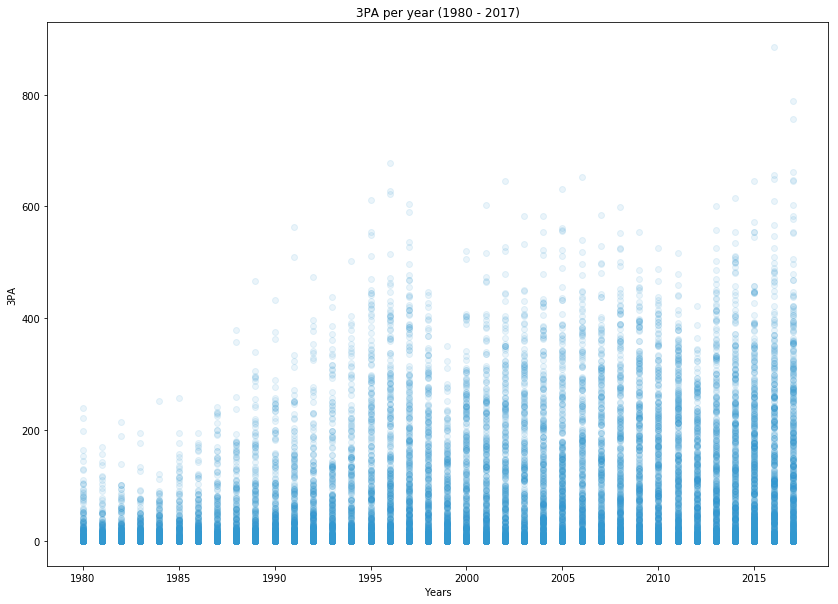

In [12]:
# Plot all 3PA per year
attemps = filtered_data['year']
total = filtered_data['3PA']

print('Total shots: {}'.format(filtered_data['3PA'].sum()))
print('Average per player/season: {} over {} seasons'.format(round(filtered_data['3PA'].mean(), 1), 
                                                     filtered_data['year'].nunique()))

plt.figure(figsize=plot_size)
plt.scatter(attemps, total, color = blue, alpha = 0.1)
plt.xlabel('Years')
plt.ylabel('3PA')
plt.title('3PA per year (1980 - 2017)')
plt.show()

# ML model

In [13]:
from sklearn.cluster import KMeans

In [14]:
'''
Select columns based on correlation values
'''
plt.figure(figsize=(20, 20))

corr = filtered_data.corr()
corr['3P'].sort_values(ascending=False)

3P       1.000000
3PA      0.991036
3PAr     0.599705
FGA      0.508917
PTS      0.494184
MP       0.493726
AST      0.460506
STL      0.454568
OWS      0.450531
FG       0.442596
OBPM     0.434116
WS       0.422641
GS       0.405815
VORP     0.402984
G        0.387820
TOV      0.386446
FT       0.353810
BPM      0.323055
FTA      0.310393
FT%      0.279846
DWS      0.273140
2PA      0.271956
AST%     0.271086
year     0.268488
PF       0.260190
2P       0.248359
PER      0.240771
DRB      0.226086
TS%      0.213981
eFG%     0.206941
WS/48    0.205108
USG%     0.199820
TRB      0.148637
STL%     0.070411
2P%      0.066646
Age      0.058218
FG%     -0.014521
BLK     -0.027386
ORB     -0.030893
3P%     -0.050509
DBPM    -0.060249
FTr     -0.166747
TOV%    -0.190566
BLK%    -0.191575
DRB%    -0.194674
TRB%    -0.290366
ORB%    -0.334456
Name: 3P, dtype: float64

<Figure size 1440x1440 with 0 Axes>

## Preparing dataset

In [15]:
df = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                            '3P':'sum', 
                                            '3PAr':'sum',
                                            'FGA':'sum',
                                            'PTS':'sum',
                                            'MP':'sum',
                                            'year':'count'
                                           })

In [16]:
df.sample(10)

,3PA,3P,3PAr,FGA,PTS,MP,year
Player,,,,,,,
Lonnie Shelton,31,3,0.052,4267.0,4852,11949,7
Kelenna Azubuike,514,210,1.622,1748.0,2178,5025,5
Dan Godfread,1,0,0.083,12.0,13,22,2
Robert Swift,0,0,0.000,340.0,416,1500,4
Brian Grant,28,6,0.039,6332.0,7933,21417,12
James Worthy*,486,117,0.446,13204.0,16320,30001,12
Coby Karl,35,8,1.188,90.0,86,297,4
Tim McCormick,18,1,0.047,3541.0,4871,12504,10
Danny Green,2123,849,4.785,3467.0,4155,11762,8


In [17]:
# Create two new columns
df['3PA_per_season'] = round(df['3PA'] / df['year'], 2)
df['3P%_career'] = (round(df['3PA'] / df['3P'], 2)) * 10

#sort values by total 3P
df = df.sort_values(by='3P', ascending=False)

# Check dataset
print(df.count())
df.sample(10)

3PA               2835
3P                2835
3PAr              2835
FGA               2835
PTS               2835
MP                2835
year              2835
3PA_per_season    2835
3P%_career        2457
dtype: int64


,3PA,3P,3PAr,FGA,PTS,MP,year,3PA_per_season,3P%_career
Player,,,,,,,,,
Alvin Williams,692,217,2.507,4232.0,4485,13681,11,62.91,31.900000
Andrea Bargnani,1771,627,2.480,6676.0,7873,15806,10,177.10,28.200000
Jeff Withey,4,0,0.030,458.0,651,2033,4,1.00,inf
Delaney Rudd,175,45,0.986,768.0,816,2357,4,43.75,38.900000
Ken Norman,741,231,1.409,7695.0,8717,18992,10,74.10,32.100000
Roy Hinson,14,0,0.017,6498.0,8384,18135,10,1.40,inf
Matt Fish,1,0,0.010,181.0,231,654,7,0.14,inf
Jay Murphy,3,0,0.064,190.0,160,436,4,0.75,inf
Brandon Armstrong,75,25,0.719,287.0,239,699,3,25.00,30.000000


In [18]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

In [19]:
print(df.count())
df.sample(20)

3PA               2007
3P                2007
3PAr              2007
FGA               2007
PTS               2007
MP                2007
year              2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


,3PA,3P,3PAr,FGA,PTS,MP,year,3PA_per_season,3P%_career
Player,,,,,,,,,
Jumaine Jones,1218,425,3.069,3052.0,3325,9780,8,152.25,28.7
Sidney Moncrief,387,110,0.757,8198.0,11931,23150,11,35.18,35.2
Scott Lloyd,7,2,0.038,882.0,973,3439,3,2.33,35.0
Michael Doleac,8,1,0.022,3160.0,3207,9818,12,0.67,80.0
Jermaine O'Neal,96,14,0.131,11795.0,14214,29391,20,4.80,68.6
Ennis Whatley,31,3,0.291,1840.0,2185,7215,13,2.38,103.3
Mehmet Okur,1590,596,2.589,6615.0,8561,18429,10,159.00,26.7
Bill Wennington,36,5,0.178,3006.0,3301,9740,13,2.77,72.0
Danilo Gallinari,2555,939,4.554,5687.0,8023,16426,10,255.50,27.2


## Add info from another dataset

In [20]:
# Load personal data
path_to_players_profiles = ('new-data/player_data.csv')
player_profiles = load_NBA_data(path_to_players_profiles)

player_profiles = player_profiles.rename(index=str, columns={'name':'Player'})

In [21]:
player_profiles.sample(5)

,Player,year_start,year_end,position,height,weight,birth_date,college
3327,James Ray,1981,1983,F,6-8,215.0,"July 27, 1957",Jacksonville University
48,Steve Alford,1988,1991,G,6-2,183.0,"November 23, 1964",Indiana University
1244,Michael Finley,1996,2010,G-F,6-7,215.0,"March 6, 1973",University of Wisconsin
4292,John Wetzel,1968,1976,G-F,6-5,190.0,"October 22, 1944",Virginia Polytechnic Institute and State Unive...
3181,Mel Peterson,1964,1970,G-F,6-4,185.0,"March 23, 1938",Wheaton College


In [22]:
# Join tables
full_df = pd.merge(df, player_profiles, on='Player', how='inner')

full_df.head()
print(df.count())

3PA               2007
3P                2007
3PAr              2007
FGA               2007
PTS               2007
MP                2007
year              2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


In [23]:
# convert position to numeric value
full_df['position'].unique()
full_df['position'] = full_df['position'].astype('category')
# Label encoding
full_df["position_encoding"] = full_df["position"].cat.codes

In [24]:
# Convert height to numeric value
full_df['height'] = full_df['height'].str.replace('-','.')

In [25]:
# Convert height to float
full_df["height"] = full_df["height"].astype('float32')

In [26]:
full_df.isnull().any()

Player               False
3PA                  False
3P                   False
3PAr                 False
FGA                  False
PTS                  False
MP                   False
year                 False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college               True
position_encoding    False
dtype: bool

In [27]:
full_df['college'] = full_df['college'].replace(np.NaN, 'None')

In [28]:
print(full_df[full_df.college.isnull()])
full_df.isnull().any()

Empty DataFrame
Columns: [Player, 3PA, 3P, 3PAr, FGA, PTS, MP, year, 3PA_per_season, 3P%_career, year_start, year_end, position, height, weight, birth_date, college, position_encoding]
Index: []


Player               False
3PA                  False
3P                   False
3PAr                 False
FGA                  False
PTS                  False
MP                   False
year                 False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college              False
position_encoding    False
dtype: bool

In [29]:
# Check for duplicates values
len(pd.concat(g for _, g in full_df.groupby("Player") if len(g) > 1))

61

In [30]:
# Drop duplicate rows
pd.concat(g for _, g in full_df.groupby('Player') if len(g) > 1)

,Player,3PA,3P,3PAr,FGA,PTS,MP,year,3PA_per_season,3P%_career,year_start,year_end,position,height,weight,birth_date,college,position_encoding
964,Bobby Jones,131,37,2.194,4228.0,6086,14412,14,9.36,35.4,1975,1986,F,6.90,210.0,"December 18, 1951",University of North Carolina,2
965,Bobby Jones,131,37,2.194,4228.0,6086,14412,14,9.36,35.4,2007,2008,F,6.70,215.0,"January 9, 1984",University of Washington,2
1434,Cedric Henderson,43,6,0.238,1813.0,1907,6214,8,5.38,71.7,1987,1987,F,6.80,210.0,"October 3, 1965",University of Georgia,2
1435,Cedric Henderson,43,6,0.238,1813.0,1907,6214,8,5.38,71.7,1998,2002,F,6.70,215.0,"March 11, 1975",University of Memphis,2
835,Charles Jones,194,59,1.211,2701.0,3311,18909,23,8.43,32.9,1984,1998,F-C,6.90,215.0,"April 3, 1957",Albany State University,3
836,Charles Jones,194,59,1.211,2701.0,3311,18909,23,8.43,32.9,1985,1989,F,6.80,215.0,"January 12, 1962",University of Louisville,2
837,Charles Jones,194,59,1.211,2701.0,3311,18909,23,8.43,32.9,1999,2000,G,6.30,180.0,"July 17, 1975",Long Island University,5
648,Charles Smith,453,122,4.455,7951.0,9830,21157,23,19.70,37.1,1989,1997,F-C,6.10,230.0,"July 16, 1965",University of Pittsburgh,3
649,Charles Smith,453,122,4.455,7951.0,9830,21157,23,19.70,37.1,1990,1996,G,6.10,160.0,"November 29, 1967",Georgetown University,5
650,Charles Smith,453,122,4.455,7951.0,9830,21157,23,19.70,37.1,1998,2006,G,6.40,194.0,"August 22, 1975",University of New Mexico,5


# Kmeans classification

In [31]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

X = full_df[['3PA','3P','3PAr', 'PTS', 'MP']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
# Create new group with values
full_df['group'] = clusters.predict(X)

In [33]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 19 columns):
Player               1972 non-null object
3PA                  1972 non-null int32
3P                   1972 non-null int32
3PAr                 1972 non-null float64
FGA                  1972 non-null float64
PTS                  1972 non-null int32
MP                   1972 non-null int32
year                 1972 non-null int64
3PA_per_season       1972 non-null float64
3P%_career           1972 non-null float64
year_start           1972 non-null int64
year_end             1972 non-null int64
position             1972 non-null category
height               1972 non-null float32
weight               1972 non-null float64
birth_date           1972 non-null object
college              1972 non-null object
position_encoding    1972 non-null int8
group                1972 non-null int32
dtypes: category(1), float32(1), float64(5), int32(5), int64(3), int8(1), object(3)
memory usage:

In [34]:
full_df.group = full_df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/Sites/virtualenvs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [35]:
full_df.group.unique()

[3, 5, 2, 0, 1, 4]
Categories (6, int64): [3, 5, 2, 0, 1, 4]

In [36]:
group_0 = full_df[(full_df['group'] == 0)]
group_1 = full_df[(full_df['group'] == 1)]
group_2 = full_df[(full_df['group'] == 2)]
group_3 = full_df[(full_df['group'] == 3)]
group_4 = full_df[(full_df['group'] == 4)]
group_5 = full_df[(full_df['group'] == 5)]

In [37]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA           3P        3PAr          FGA           PTS  \
count   312.000000   312.000000  312.000000   312.000000    312.000000   
mean    812.275641   286.064103    1.933788  4711.016026   5605.147436   
std     824.559160   313.018161    2.046337  1230.826790   1465.278073   
min       1.000000     1.000000    0.001000  2007.000000   2099.000000   
25%      83.750000    19.000000    0.220500  3823.250000   4603.000000   
50%     443.000000   128.500000    1.220500  4573.000000   5403.000000   
75%    1410.250000   512.500000    3.183500  5522.250000   6510.250000   
max    3171.000000  1328.000000    9.597000  8457.000000  10117.000000   

                 MP        year  3PA_per_season  3P%_career   year_start  \
count    312.000000  312.000000      312.000000  312.000000   312.000000   
mean   14302.128205   11.410256       80.810641   48.319551  1996.490385   
std     2246.490093    3.515463       91.292893   46.904448    11.393851   
min   

Group 4:               3PA          3P        3PAr          FGA          PTS  \
count  887.000000  887.000000  887.000000   887.000000   887.000000   
mean    91.712514   29.214205    0.720563   443.819617   490.388952   
std    129.009045   44.973071    0.785353   413.864626   468.731306   
min      1.000000    1.000000    0.005000     1.000000     3.000000   
25%     12.000000    3.000000    0.173500    95.000000    96.500000   
50%     34.000000    9.000000    0.436000   299.000000   324.000000   
75%    121.500000   36.500000    0.991500   706.000000   766.000000   
max    758.000000  296.000000    5.076000  1955.000000  2038.000000   

                MP        year  3PA_per_season  3P%_career   year_start  \
count   887.000000  887.000000      887.000000  887.000000   887.000000   
mean   1398.264938    3.357384       31.362909   40.631454  2001.374295   
std    1238.745887    2.404780       44.997893   23.339769    12.437643   
min       3.000000    1.000000        0.250000   10

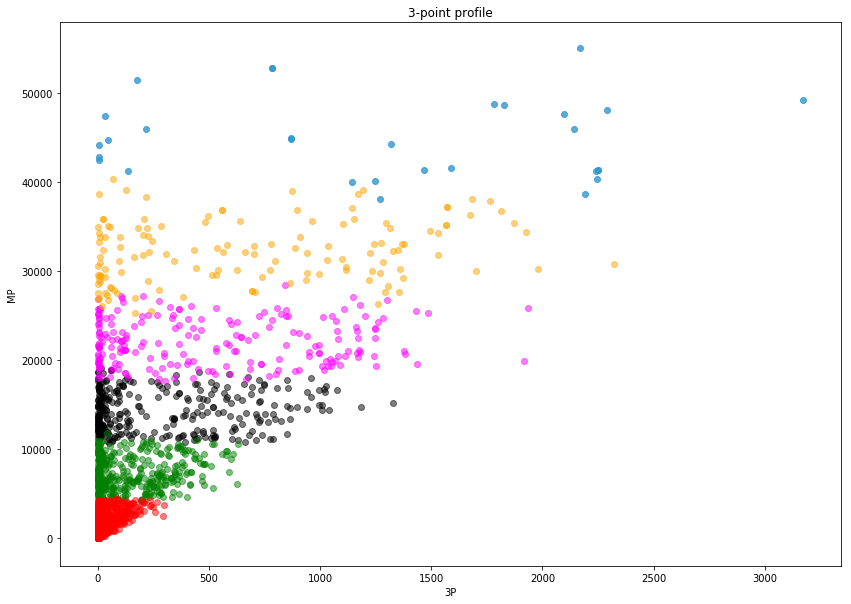

In [40]:
'''
Variables in the model:
3PA', '3P', '3PAr', 'MP', 'PTS'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = 'MP'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P')
plt.ylabel('MP')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

In [ ]:
# Exporting dataset 
df.to_csv(path_or_buf='data/RM-index.csv', sep=',')